In [1]:


% pylab inline

import os
import random

import numpy as np
import pandas as pd
from scipy.misc import imread,imresize
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer

UsageError: Line magic function `%` not found.


In [2]:
import os
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

جلب الداتاسيت وتقسيمها 

In [3]:
#بداية نقوم بجلب الداتاسيت من المجلد 

In [14]:
 data_dir = 'C:/Users/HP/Desktop/projectneural/AgeDetection/data'

In [15]:
#نجلب الداتاسيت التي نريد تدريبها واختبارها من الملف 

In [16]:

train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test  = pd.read_csv(os.path.join(data_dir, 'test.csv'))

In [17]:
# نقوم باختيار رقم عشوائي ونعرض عينة من الداتا التي نريد تدريبها


3655
20538.jpg
Age:  OLD


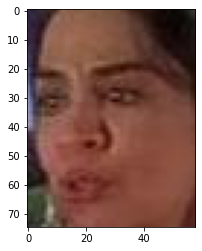

In [21]:

i = random.choice(train.index)
print(i)
img_name = train.ID[i]
img = plt.imread(os.path.join(data_dir, 'Train', img_name))
print(train.ID[i])
plt.imshow(img)
print('Age: ', train.Class[i])


In [9]:
# نقوم بعرض توزع الداتاسيت

(array([0, 1, 2]),
 [Text(0, 0, 'MIDDLE'), Text(1, 0, 'YOUNG'), Text(2, 0, 'OLD')])

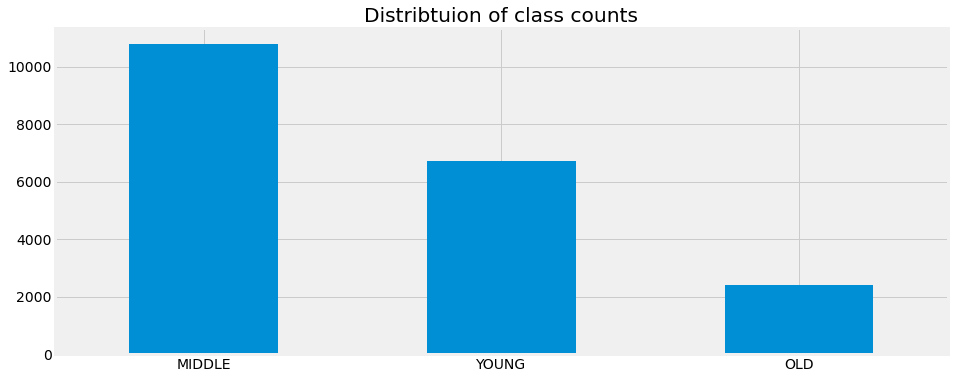

In [10]:

plt.figure(figsize = (16,6))
plt.style.use("fivethirtyeight")
train['Class'].value_counts(dropna = False).plot(kind = 'bar',grid = True)
plt.title("Distribtuion of class counts")
plt.xticks(rotation = 0)

In [11]:
train.Class.value_counts()

MIDDLE    10804
YOUNG      6706
OLD        2396
Name: Class, dtype: int64

In [12]:
#بما أن الصور تكون مختلفة الأحجام لذلك يجب توحيد حجمها لذلك نقوم بتوحيد الحجم الصور وتخزينها داخل مصفوفة ذات بعد واحد  

In [13]:
#resize لمجموعة التدريب

In [14]:


import cv2

temp = []

for img_name in train.ID:
    img_path = os.path.join(data_dir, 'Train', img_name)
    img = plt.imread(img_path)
    img = cv2.resize(img, (32,32))
    img = img.astype('float32') 
   
    temp.append(img)

train_x = np.stack(temp)
print("train")


train


In [15]:
train_x.shape

(19906, 32, 32, 3)

In [16]:
train_x

array([[[[ 48.,  46.,  47.],
         [ 42.,  40.,  41.],
         [ 42.,  44.,  43.],
         ...,
         [ 17.,  24.,  16.],
         [  5.,  12.,   4.],
         [  9.,  16.,   8.]],

        [[ 56.,  54.,  55.],
         [ 54.,  52.,  53.],
         [ 48.,  50.,  49.],
         ...,
         [ 38.,  43.,  36.],
         [ 22.,  27.,  20.],
         [ 22.,  27.,  20.]],

        [[ 62.,  61.,  59.],
         [ 61.,  61.,  59.],
         [ 64.,  64.,  62.],
         ...,
         [ 52.,  57.,  50.],
         [ 32.,  37.,  30.],
         [ 29.,  34.,  27.]],

        ...,

        [[128., 142., 133.],
         [ 78.,  89.,  81.],
         [ 45.,  52.,  45.],
         ...,
         [ 30.,  41.,  43.],
         [ 77.,  91.,  92.],
         [114., 133., 133.]],

        [[124., 152., 140.],
         [ 87., 108.,  99.],
         [ 60.,  70.,  62.],
         ...,
         [ 42.,  55.,  63.],
         [ 86., 101., 108.],
         [125., 140., 147.]],

        [[117., 145., 133.],
       

In [17]:
#resize لمجموعة الاختبار

In [18]:

import cv2
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir, 'Test', img_name)
    img = plt.imread(img_path)
    img = cv2.resize(img, (32,32))
    img = img.astype('float32')     
    temp.append(img)

test_x = np.stack(temp)
print("test")

test


In [19]:
test_x.shape
#عدد الأمثلة .الطول .العرض . التصنيف

(6636, 32, 32, 3)

In [20]:
test_x

array([[[[ 26.,  21.,  18.],
         [ 26.,  22.,  17.],
         [ 25.,  23.,  18.],
         ...,
         [ 26.,  23.,  19.],
         [ 27.,  26.,  23.],
         [ 27.,  27.,  25.]],

        [[ 29.,  26.,  21.],
         [ 24.,  22.,  17.],
         [ 24.,  23.,  18.],
         ...,
         [ 16.,  14.,  10.],
         [ 23.,  21.,  17.],
         [ 29.,  29.,  27.]],

        [[ 22.,  23.,  17.],
         [ 20.,  21.,  15.],
         [ 25.,  26.,  20.],
         ...,
         [ 20.,  15.,  12.],
         [ 24.,  22.,  19.],
         [ 28.,  28.,  24.]],

        ...,

        [[164., 131., 124.],
         [167., 134., 127.],
         [169., 136., 129.],
         ...,
         [ 21.,  14.,   8.],
         [ 17.,  14.,   7.],
         [ 14.,  13.,   5.]],

        [[152., 119., 112.],
         [154., 121., 114.],
         [157., 124., 117.],
         ...,
         [ 16.,  12.,   5.],
         [ 14.,  13.,   6.],
         [ 16.,  16.,  10.]],

        [[139., 106.,  99.],
       

In [21]:
#حبث يجب أن نقوم بتحويل القيم اللونية للصور لتصبح ضمن المجال 0و1  حيث الصور في داتاسيت تقع ضمن مجال 0 لل 255 ا  Normalizing نقوم بعمل

In [22]:

train_x = train_x/255.
test_x = test_x/255.

In [23]:
test_x

array([[[[0.10196079, 0.08235294, 0.07058824],
         [0.10196079, 0.08627451, 0.06666667],
         [0.09803922, 0.09019608, 0.07058824],
         ...,
         [0.10196079, 0.09019608, 0.07450981],
         [0.10588235, 0.10196079, 0.09019608],
         [0.10588235, 0.10588235, 0.09803922]],

        [[0.11372549, 0.10196079, 0.08235294],
         [0.09411765, 0.08627451, 0.06666667],
         [0.09411765, 0.09019608, 0.07058824],
         ...,
         [0.0627451 , 0.05490196, 0.03921569],
         [0.09019608, 0.08235294, 0.06666667],
         [0.11372549, 0.11372549, 0.10588235]],

        [[0.08627451, 0.09019608, 0.06666667],
         [0.07843138, 0.08235294, 0.05882353],
         [0.09803922, 0.10196079, 0.07843138],
         ...,
         [0.07843138, 0.05882353, 0.04705882],
         [0.09411765, 0.08627451, 0.07450981],
         [0.10980392, 0.10980392, 0.09411765]],

        ...,

        [[0.6431373 , 0.5137255 , 0.4862745 ],
         [0.654902  , 0.5254902 , 0.49803922]

In [24]:
train_x

array([[[[0.1882353 , 0.18039216, 0.18431373],
         [0.16470589, 0.15686275, 0.16078432],
         [0.16470589, 0.17254902, 0.16862746],
         ...,
         [0.06666667, 0.09411765, 0.0627451 ],
         [0.01960784, 0.04705882, 0.01568628],
         [0.03529412, 0.0627451 , 0.03137255]],

        [[0.21960784, 0.21176471, 0.21568628],
         [0.21176471, 0.20392157, 0.20784314],
         [0.1882353 , 0.19607843, 0.19215687],
         ...,
         [0.14901961, 0.16862746, 0.14117648],
         [0.08627451, 0.10588235, 0.07843138],
         [0.08627451, 0.10588235, 0.07843138]],

        [[0.24313726, 0.23921569, 0.23137255],
         [0.23921569, 0.23921569, 0.23137255],
         [0.2509804 , 0.2509804 , 0.24313726],
         ...,
         [0.20392157, 0.22352941, 0.19607843],
         [0.1254902 , 0.14509805, 0.11764706],
         [0.11372549, 0.13333334, 0.10588235]],

        ...,

        [[0.5019608 , 0.5568628 , 0.52156866],
         [0.30588236, 0.34901962, 0.31764707]

  وتدريب الشبكة العصبونية model بناء ال

In [25]:
#بما أننا نهدف إلى تصنيف داتا إلى 3 أصناف نقوم بإضافة قيم وهمية تحوي 3 أصناف لنقم بتدريبها إضافة إلى مجموعة التدريب الأساسية  


In [26]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
train_y = label.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)





Using TensorFlow backend.


In [27]:
train_y

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [28]:
train_y.shape

(19906, 3)

In [29]:
#نقوم بتقسيم مجموعة التدريب إلى مجموعتين اختبار وتدريب  

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

Lets form the CNN model:

In [44]:
#طبقة واحدة 

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

##basic
input_num_units = (32, 32, 3)


epochs = 10
batch_size = 64

model = Sequential()

model.add(Conv2D(50, (5, 5), input_shape=(input_num_units), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 50)        3800      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9800)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 29403     
Total params: 33,203
Trainable params: 33,203
Non-trainable params: 0
_________________________________________________________________


In [33]:
history=model.fit(X_train,y_train,
validation_data=(X_test,y_test),
batch_size=64, epochs=30, verbose=1)

Train on 15924 samples, validate on 3982 samples
Epoch 1/30
15924/15924 [==============================] - 12s 723us/step - loss: 0.8375 - accuracy: 0.6118 - val_loss: 0.7848 - val_accuracy: 0.6615
Epoch 2/30
15924/15924 [==============================] - 11s 689us/step - loss: 0.7554 - accuracy: 0.6673 - val_loss: 0.7470 - val_accuracy: 0.6645
Epoch 3/30
15924/15924 [==============================] - 11s 671us/step - loss: 0.7273 - accuracy: 0.6812 - val_loss: 0.7359 - val_accuracy: 0.6916
Epoch 4/30
15924/15924 [==============================] - 10s 616us/step - loss: 0.7018 - accuracy: 0.6961 - val_loss: 0.7422 - val_accuracy: 0.6894
Epoch 5/30
15924/15924 [==============================] - 10s 626us/step - loss: 0.6795 - accuracy: 0.7082 - val_loss: 0.7045 - val_accuracy: 0.6876
Epoch 6/30
15924/15924 [==============================] - 10s 638us/step - loss: 0.6589 - accuracy: 0.7150 - val_loss: 0.6932 - val_accuracy: 0.7104
Epoch 7/30
15924/15924 [==============================] -

In [ ]:
#نقوم بقياس الدقة والخطأ 

In [34]:

tr_eval_res = model.evaluate(X_train,y_train,verbose=1)
eval_res= model.evaluate(X_test,y_test,verbose=1)
print(f'train_accuracy: {tr_eval_res[1]}')
print(f'train_error: {tr_eval_res[0]}')
print(f'test_accuracy: {eval_res[1]}')
print(f'test_error: {eval_res[0]}')

3982/3982 [==============================] - 1s 156us/step
train_accuracy: 0.8615925908088684
train_error: 0.3579378702687846
test_accuracy: 0.7363134026527405
test_error: 0.711361724308901


In [ ]:
#عرض مخطط التعلم والخسارة 

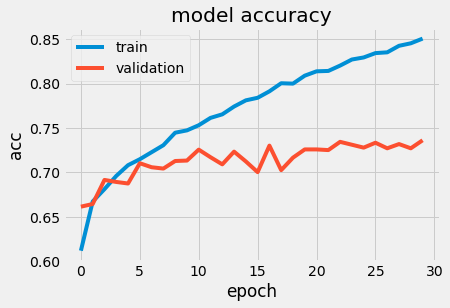

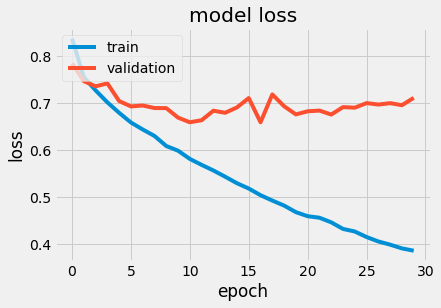

In [35]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



In [36]:
#زيادة طبقات 

In [59]:

input_num_units = (32, 32, 3)

epochs = 10
batch_size = 64

model2 = Sequential()

model2.add(Conv2D(50, (5, 5), input_shape=(input_num_units), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(40, (5, 5), input_shape=(input_num_units), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))



model2.add(Conv2D(30, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))


model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(3, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 50)        3800      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 40)        50040     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 40)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 30)          10830     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 1, 1, 30)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 30)               

In [63]:
history2=model2.fit(X_train,y_train,
validation_data=(X_test,y_test),
batch_size=64, epochs=30, verbose=1)

Train on 15924 samples, validate on 3982 samples
Epoch 1/30
15924/15924 [==============================] - 22s 1ms/step - loss: 0.3263 - accuracy: 0.8714 - val_loss: 0.7738 - val_accuracy: 0.7288
Epoch 2/30
15924/15924 [==============================] - 21s 1ms/step - loss: 0.3138 - accuracy: 0.8778 - val_loss: 0.8133 - val_accuracy: 0.7044
Epoch 3/30
15924/15924 [==============================] - 23s 1ms/step - loss: 0.3031 - accuracy: 0.8805 - val_loss: 0.8029 - val_accuracy: 0.7328
Epoch 4/30
15924/15924 [==============================] - 23s 1ms/step - loss: 0.2904 - accuracy: 0.8885 - val_loss: 0.8192 - val_accuracy: 0.7240
Epoch 5/30
15924/15924 [==============================] - 23s 1ms/step - loss: 0.2913 - accuracy: 0.8866 - val_loss: 0.8749 - val_accuracy: 0.7197
Epoch 6/30
15924/15924 [==============================] - 22s 1ms/step - loss: 0.2872 - accuracy: 0.8845 - val_loss: 0.8692 - val_accuracy: 0.7398
Epoch 7/30
15924/15924 [==============================] - 22s 1ms/ste

In [ ]:
#نقوم بقياس الدقة والخطأ 

In [40]:

tr_eval_res = model2.evaluate(X_train,y_train,verbose=0)
eval_res= model2.evaluate(X_test,y_test,verbose=0)
print(f'train_accuracy: {tr_eval_res[1]}')
print(f'train_error: {tr_eval_res[0]}')
print(f'test_accuracy: {eval_res[1]}')
print(f'test_error: {eval_res[0]}')

train_accuracy: 0.9007787108421326
train_error: 0.24901084888223965
test_accuracy: 0.9044549791493169
test_error: 0.7390758395195007


In [ ]:
#عرض مخطط التعلم والخسارة 

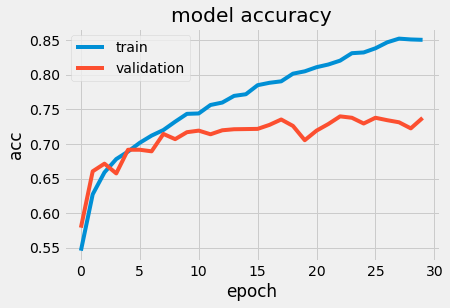

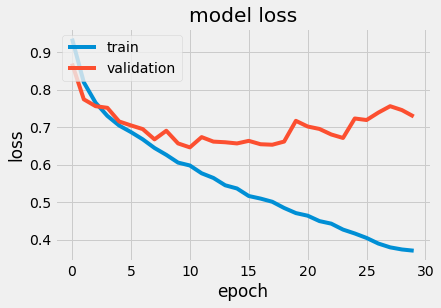

In [57]:



plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



In [ ]:
#استخدام dropout

In [66]:


##drooupt
input_num_units = (32, 32, 3)
#hidden_num_units = 500
#output_num_units = 3

epochs = 10
batch_size = 64

model3 = Sequential()

model3.add(Conv2D(50, (5, 5), input_shape=(input_num_units), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(40, (5, 5), input_shape=(input_num_units), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(30, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Dropout(0.3))

model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(50, activation='relu'))
model3.add(Dense(3, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 50)        3800      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 40)        50040     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 40)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 30)          10830     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 30)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 30)         

In [67]:
history3=model3.fit(X_train,y_train,
validation_data=(X_test,y_test),
batch_size=64, epochs=30, verbose=1)

Train on 15924 samples, validate on 3982 samples
Epoch 1/30
15924/15924 [==============================] - 23s 1ms/step - loss: 0.9398 - accuracy: 0.5476 - val_loss: 0.8474 - val_accuracy: 0.6140
Epoch 2/30
15924/15924 [==============================] - 23s 1ms/step - loss: 0.8237 - accuracy: 0.6265 - val_loss: 0.7584 - val_accuracy: 0.6713
Epoch 3/30
15924/15924 [==============================] - 22s 1ms/step - loss: 0.7756 - accuracy: 0.6590 - val_loss: 0.7461 - val_accuracy: 0.6713
Epoch 4/30
15924/15924 [==============================] - 23s 1ms/step - loss: 0.7375 - accuracy: 0.6780 - val_loss: 0.7558 - val_accuracy: 0.6647
Epoch 5/30
15924/15924 [==============================] - 22s 1ms/step - loss: 0.7229 - accuracy: 0.6812 - val_loss: 0.7116 - val_accuracy: 0.6896
Epoch 6/30
15924/15924 [==============================] - 22s 1ms/step - loss: 0.7008 - accuracy: 0.6934 - val_loss: 0.6823 - val_accuracy: 0.7004
Epoch 7/30
15924/15924 [==============================] - 22s 1ms/ste

In [ ]:
#نقوم بقياس الدقة والخطأ 

In [84]:

tr_eval_res = model3.evaluate(X_train,y_train,verbose=0)
eval_res= model3.evaluate(X_test,y_test,verbose=0)
print(f'train_accuracy: {tr_eval_res[1]}')
print(f'train_error: {tr_eval_res[0]})')
print(f'test_accuracy: {eval_res[1]}')
print(f'test_error: {eval_res[0]}')

train_accuracy: 0.841559886932373
train_error: 0.4173941980337144)
test_accuracy: 0.7373179197311401
test_error: 0.6396463718742417


In [69]:
#عرض مخطط التعلم والخسارة

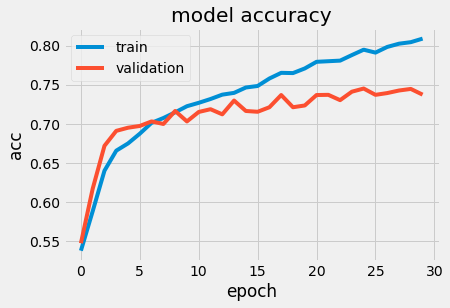

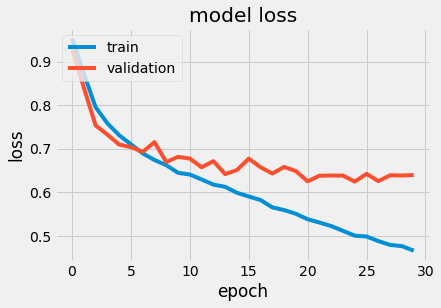

In [85]:

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [71]:
#استخدام  Batch Normalization 

In [88]:
from keras.layers import BatchNormalization

##drooupt
input_num_units = (32, 32, 3)
#hidden_num_units = 500
#output_num_units = 3

epochs = 10
batch_size = 64

model4 = Sequential()

model4.add(Conv2D(50, (5, 5), input_shape=(input_num_units), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(BatchNormalization())

model4.add(Conv2D(40, (5, 5), input_shape=(input_num_units), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(BatchNormalization())

model4.add(Conv2D(30, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(BatchNormalization())


model4.add(Dropout(0.3))

model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dense(50, activation='relu'))
model4.add(Dense(3, activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model4.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 50)        3800      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 40)        50040     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 40)          0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 5, 5, 40)          160       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 3, 3, 30)        

In [89]:
history4=model4.fit(X_train,y_train,
validation_data=(X_test,y_test),
batch_size=64, epochs=30, verbose=1)

Train on 15924 samples, validate on 3982 samples
Epoch 1/30
15924/15924 [==============================] - 25s 2ms/step - loss: 0.8426 - accuracy: 0.6113 - val_loss: 0.9878 - val_accuracy: 0.4721
Epoch 2/30
15924/15924 [==============================] - 24s 2ms/step - loss: 0.7698 - accuracy: 0.6638 - val_loss: 0.7724 - val_accuracy: 0.6597
Epoch 3/30
15924/15924 [==============================] - 24s 2ms/step - loss: 0.7239 - accuracy: 0.6853 - val_loss: 0.7475 - val_accuracy: 0.6801
Epoch 4/30
15924/15924 [==============================] - 24s 2ms/step - loss: 0.6884 - accuracy: 0.7045 - val_loss: 0.7027 - val_accuracy: 0.6836
Epoch 5/30
15924/15924 [==============================] - 24s 2ms/step - loss: 0.6605 - accuracy: 0.7156 - val_loss: 0.9560 - val_accuracy: 0.5816
Epoch 6/30
15924/15924 [==============================] - 24s 2ms/step - loss: 0.6328 - accuracy: 0.7286 - val_loss: 0.7060 - val_accuracy: 0.7064
Epoch 7/30
15924/15924 [==============================] - 24s 2ms/ste

In [ ]:
#نقوم بقياس الدقة والخطأ 

In [75]:

tr_eval_res = model4.evaluate(X_train,y_train,verbose=0)
eval_res= model4.evaluate(X_test,y_test,verbose=0)
print(f'train_accuracy: {tr_eval_res[1]}')
print(f'train_error: {tr_eval_res[0]})')
print(f'test_accuracy: {eval_res[1]}')
print(f'test_error: {eval_res[0]}')

train_accuracy: 0.8946872353553772
train_error: 0.27052154258189265)
test_accuracy: 0.74485182762146
test_error: 0.7307337263251955


In [76]:
#عرض مخطط التعلم والخسارة

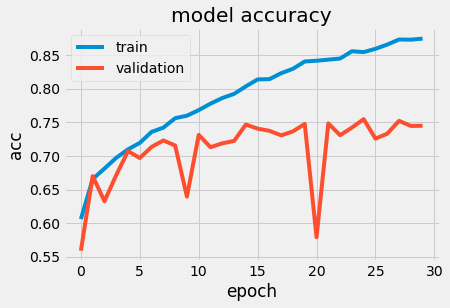

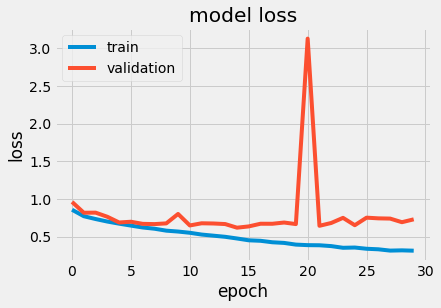

In [78]:

plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [93]:
# لنرى توقع الشبكة لمجموعة الاختبار


In [94]:
sample_submission = pd.read_csv(os.path.join(data_dir, 'one.csv'))


ERROR! Session/line number was not unique in database. History logging moved to new session 934


In [101]:
test_x_temp = test_x.reshape(-3, 32, 32, 3)
pred = model.predict_classes(test_x_temp)

pred.shape


(6636,)

In [102]:
pred_f = label.inverse_transform(pred)
pred_f

array(['MIDDLE', 'MIDDLE', 'MIDDLE', ..., 'MIDDLE', 'MIDDLE', 'MIDDLE'],
      dtype=object)

In [96]:
sample_submission.ID = test.ID
sample_submission.Class = pred_f


3305
25379.jpg
Age:  MIDDLE


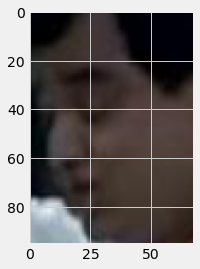

In [97]:

i = random.choice(sample_submission.index)
print(i)
img_name = sample_submission.ID[i]
img = plt.imread(os.path.join(data_dir, 'Test', img_name))
print(sample_submission.ID[i])
plt.imshow(img)
print('Age: ', sample_submission.Class[i])


3794
12226.jpg
Age:  MIDDLE


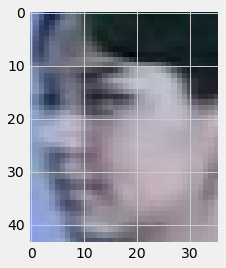

In [98]:
i = random.choice(sample_submission.index)
print(i)
img_name = sample_submission.ID[i]
img = plt.imread(os.path.join(data_dir, 'Test', img_name))
print(sample_submission.ID[i])
plt.imshow(img)
print('Age: ', sample_submission.Class[i])

In [99]:
# نقوم بعرض جميع الصور مع الكلاس التي تنتمي له 
sample_submission

,Unnamed: 0,Class,ID
0,0,MIDDLE,25321.jpg
1,1,MIDDLE,989.jpg
2,2,MIDDLE,19277.jpg
3,3,MIDDLE,13093.jpg
4,4,MIDDLE,5367.jpg
...,...,...,...
6631,6631,MIDDLE,1876.jpg
6632,6632,MIDDLE,14940.jpg
6633,6633,MIDDLE,3638.jpg
6634,6634,MIDDLE,376.jpg


In [ ]:
#واجهة لكي يقوم المستخدم باختيار صورة وعرض الصنف الذي تنتمي لها

In [ ]:

from tkinter import *
from tkinter import filedialog
from PIL import  Image,ImageTk


class GUI(Frame):

    def __init__(self, master=None):
        Frame.__init__(self, master)
        w,h = 650, 650
        master.minsize(width=w, height=h)
        master.maxsize(width=w, height=h)
        self.pack()

        self.file = Button(self, text='Browse', command=self.choose)
        self.choose = Label(self, text="Choose file").pack()
        self.image = PhotoImage(file='')
        self.label = Label(image=self.image)
        

        self.file.pack()
        self.label.pack()

    def choose(self):
        ifile = filedialog.askopenfile(parent=self,mode='rb',title='Choose a file')
        path = Image.open(ifile)
        s=str(ifile)
        s1=os.path.split(s)[-1]
        print(s1[0])
        self.image2 = ImageTk.PhotoImage(path)
        print("lllllllll")
        print(self.image2)
        print('Age: ', sample_submission.Class[int(s1[0])])
        self.label.configure(image=self.image2)
        self.label.image=self.image2
        self.choose1 = Label(self, text=sample_submission.Class[int(s1[0])]).pack()
        


root = Tk()
app = GUI(master=root)
app.mainloop()
root.destroy()

ERROR! Session/line number was not unique in database. History logging moved to new session 980
2
lllllllll
pyimage88
Age:  MIDDLE


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\envs\tensor\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-105-7a675227e669>", line 43, in <module>
    root.destroy()
  File "C:\Users\HP\anaconda3\envs\tensor\lib\tkinter\__init__.py", line 2062, in destroy
    self.tk.call('destroy', self._w)
_tkinter.TclError: can't invoke "destroy" command: application has been destroyed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\envs\tensor\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TclError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\envs\tensor\lib\site-packages